In [19]:
import tensorflow as tf

In [20]:
mnist = tf.keras.datasets.mnist

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
x_train.shape  #60000 samples with each 28*28 images

(60000, 28, 28)

In [23]:
y_train.shape

(60000,)

In [24]:
y_train[0]

5

In [25]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [26]:
#normalize the data as u can see minimum is 0 and max goes upto 255
# we'll keep data btw 0 & 1

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [27]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

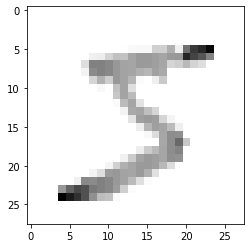

In [28]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [30]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2652 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1074 - accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0721 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0541 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0416 - accuracy: 0.9867


In [32]:
val_loss, val_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9752


In [33]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [36]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [42]:
pred = new_model.predict(x_test)
print(pred)

[[4.73568351e-10 8.95328700e-09 7.34618482e-07 ... 9.99997258e-01
  3.58634423e-07 7.22303142e-08]
 [1.46566079e-10 1.60834941e-06 9.99998450e-01 ... 4.07434225e-11
  1.60593991e-08 2.14232115e-13]
 [1.03457417e-07 9.99960661e-01 4.20611832e-06 ... 6.39929203e-06
  2.44114599e-05 1.00672786e-07]
 ...
 [7.58990006e-12 8.05629483e-08 9.98439387e-11 ... 2.49966490e-07
  7.40340900e-09 7.68238806e-06]
 [1.64034670e-08 1.49108692e-09 1.14609866e-09 ... 9.92240867e-09
  2.40109730e-05 1.59648084e-09]
 [1.30376221e-09 5.02861572e-11 2.18157478e-10 ... 9.09137240e-13
  3.28290084e-09 2.33196823e-10]]


In [44]:
import numpy as np

print(np.argmax(pred[1]))

2


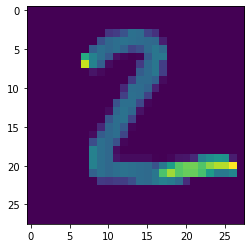

In [45]:
plt.imshow(x_test[1])
plt.show()